In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Step 2: Load Dataset
df = pd.read_csv("PPG signal of MAX30102.csv")  # Replace with your actual filename
df.head()


,Red (a.u),Infra Red (a.u),Gender,Age (year),Hemoglobin (g/dL)
0,115965.9,105722.9,Male,21,17.5
1,115834.4,105746.7,Male,21,17.5
2,115741.5,105786.0,Male,21,17.5
3,115707.2,105848.1,Male,21,17.5
4,115675.6,105893.5,Male,21,17.5


In [4]:
# Step 3: Handle Missing Data
df.dropna(inplace=True)
print("Remaining rows after removing nulls:", len(df))


Remaining rows after removing nulls: 816


In [5]:
# Step 4: Encode Categorical Columns
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male = 0, Female = 1


In [6]:
# Step 5: Feature Engineering
df['Red/IR Ratio'] = df['Red (a.u)'] / df['Infra Red (a.u)']


In [7]:
# Step 6: Remove Outliers using IQR
for col in ['Red (a.u)', 'Infra Red (a.u)', 'Red/IR Ratio']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]
df.reset_index(drop=True, inplace=True)


In [8]:
# Step 7: Prepare Features and Target
features = ['Red (a.u)', 'Infra Red (a.u)', 'Red/IR Ratio', 'Gender', 'Age (year)']
target = 'Hemoglobin (g/dL)'

X = df[features]
y = df[target]


In [9]:
# Step 8: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
# Step 9: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [11]:
# Step 10: Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [12]:
# Step 11: Make Predictions
y_pred = model.predict(X_test)


In [21]:
# Step 12: Evaluate Accuracy
print("Model Evaluation Metrics")
print("------------------------")
print("R² Score :", round(r2_score(y_test, y_pred), 4))
print("RMSE     :", round(np.sqrt(mean_squared_error(y_test, y_pred)), 4), "g/dL")
print("MAE      :", round(mean_absolute_error(y_test, y_pred)), 4), "g/dL"


Model Evaluation Metrics
------------------------
R² Score                  : 0.9908
Explained Variance Score : 0.9908
RMSE                     : 0.172 g/dL
MAE                      : 0.04 g/dL
MAPE                     : 0.31 %
Max Error                : 1.272 g/dL
Clinical Accuracy (±1.0 g/dL): 99.35 %


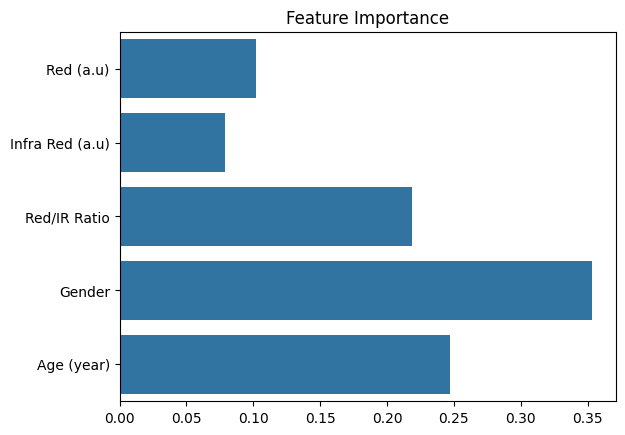

In [15]:
# Step 13: Feature Importance (Optional)
importances = model.feature_importances_
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()


In [19]:
# Step 14: Save Model and Scaler
joblib.dump(model, "PPG signal of MAX30102.pkl")
joblib.dump(scaler, "PPG signal of MAX30102_scaler.pkl")


['PPG signal of MAX30102_scaler.pkl']

In [20]:
# Step 15: Predict New Sample
# Example input: [Red, IR, Gender (0/1), Age]
sample = pd.DataFrame([[116000, 105800, 0, 21]], columns=['Red (a.u)', 'Infra Red (a.u)', 'Gender', 'Age (year)'])
sample['Red/IR Ratio'] = sample['Red (a.u)'] / sample['Infra Red (a.u)']
sample_scaled = joblib.load("PPG signal of MAX30102_scaler.pkl").transform(sample[features])
predicted_hb = joblib.load("PPG signal of MAX30102.pkl").predict(sample_scaled)
print("Predicted Hemoglobin (g/dL):", round(predicted_hb[0], 2))


Predicted Hemoglobin (g/dL): 11.57
